In [2]:
from world import *

In [3]:
world = World()

world.init_nation(
    'Not Sociable',
    pop_size=1000,
    avg_compliance=.5,
    avg_age=20,
    sociability=2
)

world.init_nation(
    'Somewhat Sociable',
    pop_size=1000,
    avg_compliance=.5,
    avg_age=20,
    sociability=5,
    borders=['Not Sociable', 'Very Sociable']
)

world.init_nation(
    'Very Sociable',
    pop_size=1000,
    avg_compliance=.5,
    avg_age=20,
    sociability=20
)

world.init_borders()


world.initiate_infection('Somewhat Sociable')

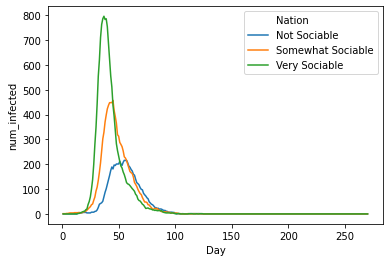

In [8]:
world.new_day(days=90, verbose=False)
world.plot_infections()
plt.show()


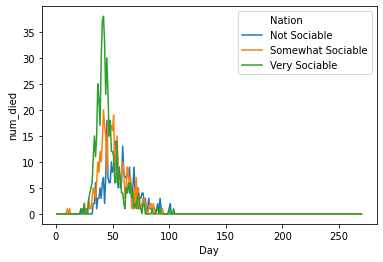

In [9]:

world.plot_deaths()
plt.show()